# keras를 이용한 손글씨 인식 딥러닝
- tensorflow로 작성된 프로그램은 sklearn library보다 어렵다
- keras는 머신러닝 라이브러리 Theano(테아노)와 tensorflow를 wrapping한 라이브러리


In [66]:
import pandas as pd
train = pd.read_csv("../Data/train_20k.csv",header=None)
test = pd.read_csv("../Data/test_1k.csv",header=None)

In [67]:
print(train.count())

0      20001
1      20001
2      20001
3      20001
4      20001
       ...  
780    20001
781    20001
782    20001
783    20001
784    20001
Length: 785, dtype: int64


---
# preprocessing

In [68]:
# null - train
train.isnull().sum().sum()

0

In [69]:
# null - test
test.isnull().sum().sum()

0

In [70]:
# train과 test를 feature와 target으로 분리하고 정규화하기 
train_label = train.loc[:,train.columns == 0 ]
train_data = train.loc[:,train.columns != 0 ]

test_label = test.loc[:,test.columns == 0 ]
test_data = test.loc[:,test.columns != 0 ]

In [71]:
train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19999,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# feature만 정규화 
# 이미지라 최대값인 255로 나눈다 
train_data = train_data / 255
test_data = test_data / 255
# 정규화란 0과 1사이의 값으로 만드는 것인데 여기서 max로 나누지 않은 이유는 시각화는 255가 밝은색이므로 역으로 나타날 수 있다.

In [73]:
train_data

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
test_data 

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### deep learning model 만들기

In [75]:
# gpu 사용설정

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


In [76]:
from tensorflow import keras

In [77]:
# 출력층은 숫자 0 ~ 9이므로 10개이다 

In [78]:
# 층 추가 
model = keras.Sequential()
# input_shape = 입력층
# hidden layer
model.add(keras.layers.Dense(512,activation = "relu",input_shape=(784,)))
# activation = sigmoid, tanh, relu, softmax, leakyRelu
#model.add(keras.layers.Dense(512,activation = "simoid",input_shape=(784,)))
#model.add(keras.layers.Dense(512,activation = "tanh",input_shape=(784,)))
# 출력층 
# 다중분류 
model.add(keras.layers.Dense(10,activation = "softmax"))

In [79]:
from pickletools import optimize
from sklearn import metrics
# optimizer
# 출발 =>  경사하강법 
# 손실함수가 있어야만 optimizer
model.compile(
    optimizer = "rmsprop",
    loss = "sparse_categorical_crossentropy", # 출력층이 정수로 나와서 
    metrics = ['accuracy'] # 모델 측정 방법 : 정확도
)
# optimizer : learning rate를 알맞게 조정해줌
# - adam
# - adagrad
# - adadelta
# - rmsprop
# - sgdf : 경사하강법

In [80]:
len(train_data)

20001

In [81]:
len(train_label)

20001

In [82]:
# 데이터 훈련하기 
import numpy as np

model.fit(
    np.array(train_data),  #문제 =>2차원 배열
    np.array(train_label),  # 정답 
    epochs=20
)

Epoch 1/20
626/626 [==============================] - 4s 6ms/step - loss: 0.3094 - accuracy: 0.9100
Epoch 2/20
626/626 [==============================] - 3s 5ms/step - loss: 0.1350 - accuracy: 0.9606
Epoch 3/20
626/626 [==============================] - 3s 5ms/step - loss: 0.0885 - accuracy: 0.9740
Epoch 4/20
626/626 [==============================] - 3s 5ms/step - loss: 0.0605 - accuracy: 0.9820
Epoch 5/20
626/626 [==============================] - 3s 5ms/step - loss: 0.0437 - accuracy: 0.9874
Epoch 6/20
626/626 [==============================] - 4s 6ms/step - loss: 0.0317 - accuracy: 0.9906
Epoch 7/20
626/626 [==============================] - 3s 5ms/step - loss: 0.0225 - accuracy: 0.9934
Epoch 8/20
626/626 [==============================] - 3s 5ms/step - loss: 0.0168 - accuracy: 0.9951
Epoch 9/20
626/626 [==============================] - 3s 5ms/step - loss: 0.0121 - accuracy: 0.9960
Epoch 10/20
626/626 [==============================] - 3s 5ms/step - loss: 0.0077 - accuracy: 0.9973

> optimizer : relu일 때 epoch 정확도 0.9998 

---
## 테스트 데이터로 평가하기

In [83]:
score = model.evaluate(test_data,test_label)
print("loss :",score[0])
print("accuracy :",score[1])

32/32 [==============================] - 0s 2ms/step - loss: 0.1973 - accuracy: 0.9760
loss : 0.19730818271636963
accuracy : 0.9760239720344543


---
## test_data로 predict 해보기 


In [84]:
pred = model.predict(test_data)
print("test label : ",test_label[:10])
print("pred : ",np.argmax(pred[:10],axis=1))

32/32 [==============================] - 0s 2ms/step
test label :     0
0  7
1  2
2  1
3  0
4  4
5  1
6  4
7  9
8  5
9  9
pred :  [7 2 1 0 4 1 4 9 6 9]


In [110]:
np.argmax(np.array([1,3,5,2,]))
# 축을 따라 가장 큰 값의 인덱스를 반환 

2

In [109]:
np.array([1,5,3,2,])

array([1, 5, 3, 2])

---
### 번외 image 만들기

In [86]:
from PIL import Image

In [90]:
# 0번의 정답을 제외한 데이터 만들기 
train1 = train.loc[:,train.columns != 0 ]
train1.shape


(20001, 784)

In [91]:
# train data의 50번째 크기 만들기 
abc = np.array(train1.iloc[50]).reshape(28,28)
abc.shape

(28, 28)

In [93]:
# image
image = Image.fromarray((abc).astype(np.uint8))
image

In [95]:
image.save("../Data/mnist_test3.jpg","JPEG")

---
# 이미지 불러서 predict 하기 


In [97]:
img = Image.open("../Data/mnist_test3.jpg")
img

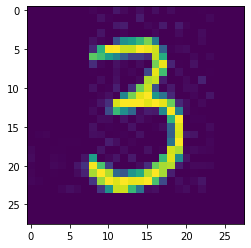

In [98]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [99]:
# image 를 numpy 로 변환 
imgArray = np.array(img)
imgArray = imgArray / 255
imgArray.shape

(28, 28)

In [101]:
# image 를 1차원으 로 변환 
imgArray2 = imgArray.reshape(-1)
imgArray2.shape

(784,)

In [103]:
# 리스트 변환
imgArray3 = imgArray2.tolist()

In [105]:
dfArray = pd.DataFrame(imgArray3)
dfArray

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
779,0.0
780,0.0
781,0.0
782,0.0


In [106]:
dfArray=dfArray.T 
dfArray
# 예측한 모양대로 모양만들기

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
print(np.argmax(model.predict(dfArray),axis=1))

1/1 [==============================] - 0s 25ms/step
[3]
